In [1]:
import pandas as pd
from scipy import stats

# Load the data
cutlets_data = pd.read_csv("/content/Cutlets.csv")

In [2]:
# Display the data
print("Data:")
print(cutlets_data.head())

Data:
   Unit A  Unit B
0  6.8090  6.7703
1  6.4376  7.5093
2  6.9157  6.7300
3  7.3012  6.7878
4  7.4488  7.1522


In [3]:
from scipy import stats

# Shapiro-Wilk test for normality
stat, p = stats.shapiro(cutlets_data['Unit A'])
print("Unit A - Statistics=%.3f, p=%.3f" % (stat, p))

Unit A - Statistics=0.965, p=0.320


In [4]:
stat, p = stats.shapiro(cutlets_data['Unit B'])
print("Unit B - Statistics=%.3f, p=%.3f" % (stat, p))

Unit B - Statistics=0.973, p=0.523


In [5]:
# Levene's test for homogeneity of variances
stat, p = stats.levene(cutlets_data['Unit A'], cutlets_data['Unit B'])
print("Statistics=%.3f, p=%.3f" % (stat, p))


Statistics=0.665, p=0.418


In [6]:
# Conduct independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(cutlets_data['Unit A'], cutlets_data['Unit B'])
print("t-statistic=%.3f, p-value=%.3f" % (t_statistic, p_value))


t-statistic=0.723, p-value=0.472


In [7]:
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant difference in the mean diameter of cutlets between the two units.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the mean diameter of cutlets between the two units.")



Fail to reject the null hypothesis. There is no significant difference in the mean diameter of cutlets between the two units.


In [8]:
import pandas as pd

# Load the data
labtat_data = pd.read_csv("/content/LabTAT.csv")

# Display the data
print("Data:")
print(labtat_data.head())


Data:
   Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0        185.35        165.53        176.70        166.13
1        170.49        185.91        198.45        160.79
2        192.77        194.92        201.23        185.18
3        177.33        183.00        199.61        176.42
4        193.41        169.57        204.63        152.60


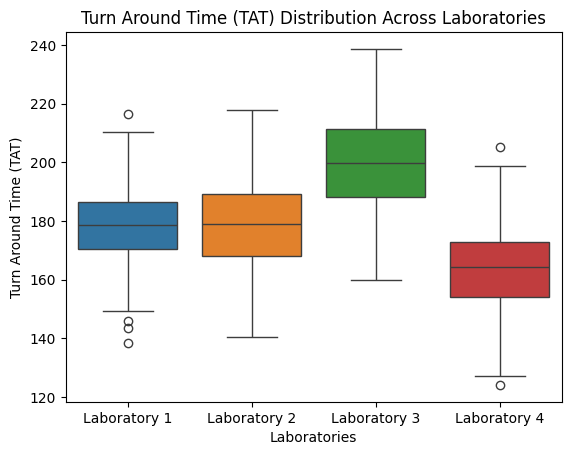

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize TAT distribution across laboratories
sns.boxplot(data=labtat_data)
plt.title('Turn Around Time (TAT) Distribution Across Laboratories')
plt.xlabel('Laboratories')
plt.ylabel('Turn Around Time (TAT)')
plt.show()


In [10]:
from scipy import stats

# Shapiro-Wilk test for normality
for lab in labtat_data.columns:
    stat, p = stats.shapiro(labtat_data[lab])
    print(f"{lab}: Statistics={stat:.3f}, p={p:.3f}")


Laboratory 1: Statistics=0.990, p=0.551
Laboratory 2: Statistics=0.994, p=0.864
Laboratory 3: Statistics=0.989, p=0.420
Laboratory 4: Statistics=0.991, p=0.662


In [11]:
# One-way ANOVA test
stat, p = stats.f_oneway(labtat_data['Laboratory 1'], labtat_data['Laboratory 2'], labtat_data['Laboratory 3'], labtat_data['Laboratory 4'])
print("ANOVA Test:")
print("F-statistic=%.3f, p-value=%.3f" % (stat, p))


ANOVA Test:
F-statistic=118.704, p-value=0.000


In [12]:
alpha = 0.05
if p < alpha:
    print("\nReject the null hypothesis. There is a significant difference in the average TAT among the different laboratories.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the average TAT among the different laboratories.")



Reject the null hypothesis. There is a significant difference in the average TAT among the different laboratories.


In [13]:
import pandas as pd

# Load the data
buyer_ratio_data = pd.read_csv("/content/BuyerRatio.csv")

# Display the data
print("Data:")
print(buyer_ratio_data)


Data:
  Observed Values  East  West  North  South
0           Males    50   142    131     70
1         Females   435  1523   1356    750


In [14]:
from scipy import stats

# Chi-square test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(buyer_ratio_data.iloc[:, 1:])

print("\nChi-square Test Results:")
print("Chi-square Statistic=%.3f, p-value=%.3f" % (chi2_stat, p_val))



Chi-square Test Results:
Chi-square Statistic=1.596, p-value=0.660


In [15]:
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis. Not all proportions are equal across regions.")
else:
    print("\nFail to reject the null hypothesis. All proportions are equal across regions.")



Fail to reject the null hypothesis. All proportions are equal across regions.
